##### univariate exploration means generation of visuals based on a single variable.
##### The plots are determined using the data type of the data to be plotted.
Qualitative data
<ul>
<li><a href="#bar">Bar Chart</a></li>
<li><a href="#pie">Pie Chart</a></li>
<li><a href="#Donut">Donut Chart</a></li>

</ul>

Quantitative data
<ul>
<li><a href="#hist">Histogram Chart</a></li>


</ul>


In [1]:
# imoport libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading dataset
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head(4)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50


<a id='bar'></a>
#### Bar Charts   
    A bar chart is used to depict the distribution of a categorical variable.   
    In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

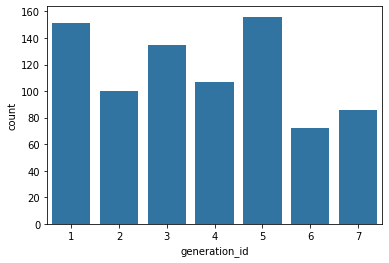

In [5]:
# ploting barchart for categoriacal variable 'generation'
base_color = sb.color_palette()[0] # multiple colors arise confusion, to avoide that we use a single color
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

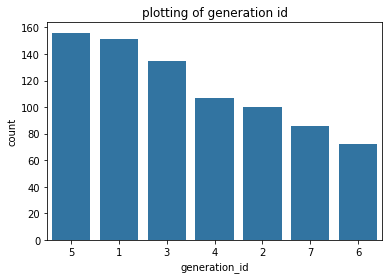

In [9]:
# to sort the data in barchart we need to add order it up. so
bar_order = pokemon.generation_id.value_counts().index
base_color = sb.color_palette()[0] # multiple colors arise confusion, to avoide that we use a single color
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = bar_order);
plt.title('plotting of generation id');

<a id='pie'></a>
#### Pie Charts
    A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

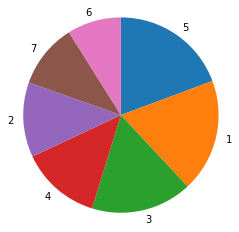

In [12]:
# code for the pie chart 
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

<a id='Donut'></a>
#### Donut Plot
    Add wedgeprops

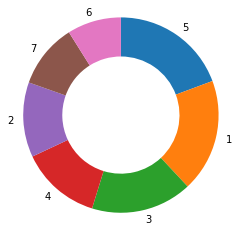

In [13]:
# code for the pie chart 
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

<a id='hist'></a>
#### Histograms
    A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

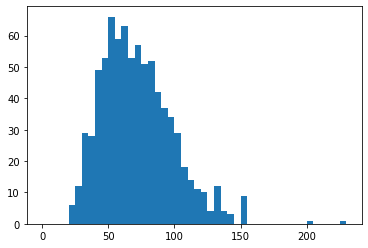

In [28]:
# histogram that depicts the distribution of 'special-defense' values taken.
bin_edges = np.arange(0,pokemon['special-defense'].max() +5,5) # to set the range of values in a bar
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges);

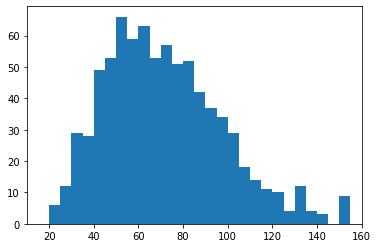

In [21]:
# to remove otliers use 'xlim'

bin_edges = np.arange(0,pokemon['special-defense'].max() +5,5) # to set the range of values in a bar
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges);
plt.xlim(10,160);

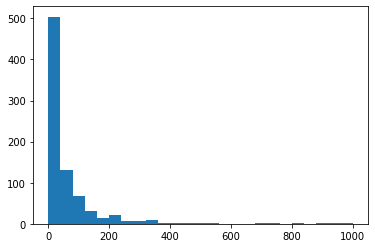

In [17]:
#ploting log values.
# plot for weight
bin_edges = np.arange(0,pokemon['weight'].max() +40,40) # to set the range of values in a bar
plt.hist(data = pokemon, x = 'weight', bins = bin_edges);

    here the value is heavily right skewed, so let us plot this using a log values.
    

In [18]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

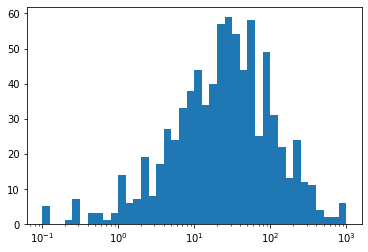

In [19]:
# plot log based on minimum and max value.
bins = 10** np.arange(-1,3 + 0.1 , 0.1)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon , x = 'weight', bins = bins)
plt.xscale('log')

    here we have plotted x-axis based on the log values of weight, it helped us in getting the values spreaded throughout.

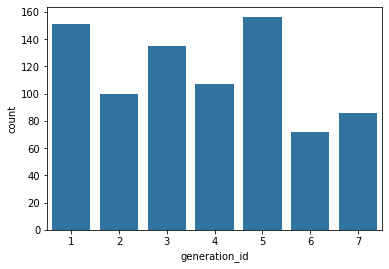

In [27]:
## to manualy add axes use 
fig = plt.figure()
ax = fig.add_axes([0, 0, .775, .775])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)